# Loading Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading encoded data

In [2]:
data = pd.read_csv('../data/jojo-stands.csv', encoding='latin1')

In [3]:
data.head()

,Stand,PWR,SPD,RNG,PER,PRC,DEV
0,Anubis,B,B,E,A,E,C
1,Atum,D,C,D,B,D,D
2,Bastet,E,E,B,A,E,E
3,Cream,B,B,D,C,C,D
4,Death Thirteen,C,C,E,B,D,B


# Handling null stats by creating new class

In [4]:
# Removing null values
data[['PWR','SPD','RNG','PER','PRC','DEV']] = data.drop('Stand', axis=1).fillna('F')

# Encoding data (str -> int) for model creation

In [5]:
# Encoding data

# Encode map
grid_map = {'F': 0, 'E': 2, 'D': 4, 'C': 6, 'B': 8, 'A': 10, 'Infi': 20}

# Data encoding
data[['PWR','SPD','RNG','PER','PRC','DEV']] = data.drop('Stand', axis=1).replace(grid_map)
data.to_csv('../data/encoded-jojo-stands.csv', encoding='latin1', index=False)

C:\Users\manpr\AppData\Local\Temp\ipykernel_17012\214810725.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[['PWR','SPD','RNG','PER','PRC','DEV']] = data.drop('Stand', axis=1).replace(grid_map)


# Preprocessing

In [6]:
x = data.drop('Stand', axis=1)

In [7]:
# Creating scaler to normalize values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Clustering

In [8]:
kmeans = KMeans(n_clusters=4,random_state=42)
cluster_labels = kmeans.fit_predict(x_scaled)
mapping = {3:0,1:1,0:2,2:3}

mapped_labels = [mapping[label] for label in cluster_labels]

data['Rank'] = mapped_labels

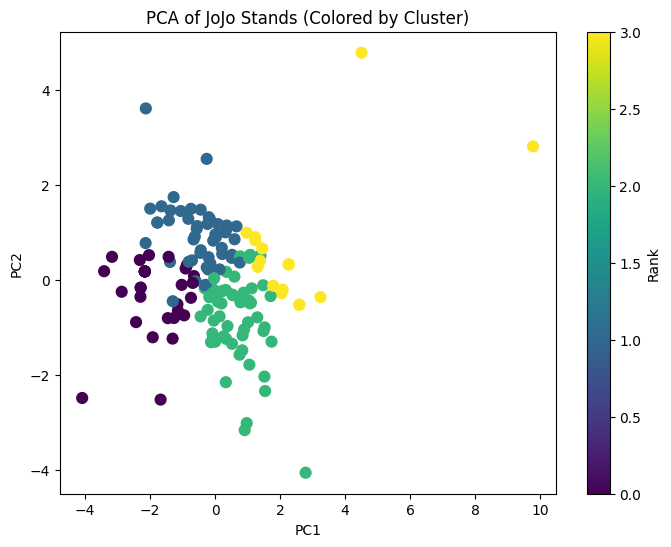

In [9]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_scaled)


plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['Rank'], cmap='viridis', s=60)
plt.title("PCA of JoJo Stands (Colored by Cluster)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Rank')
plt.show()

# Creating labeled csv

In [10]:
data.to_csv('../data/labeled-encoded-jojo-stands.csv', encoding='latin1', index=False)

In [11]:
data['Rank'].value_counts().reset_index()

,Rank,count
0,2,60
1,1,50
2,0,30
3,3,16


In [12]:
centroids = kmeans.cluster_centers_

centroids_original = scaler.inverse_transform(centroids)
centroid_df = pd.DataFrame(centroids_original, columns=['PWR', 'SPD', 'RNG', 'PER', 'PRC', 'DEV'])
centroid_df.index.name = 'Rank'
print(centroid_df)

           PWR        SPD       RNG        PER       PRC    DEV
Rank                                                           
0     7.666667   7.633333  5.533333   7.333333  5.133333  7.300
1     3.640000   5.440000  9.240000   9.280000  4.080000  3.640
2     9.375000  11.500000  9.375000  11.250000  8.750000  7.625
3     2.466667   3.000000  2.400000   8.400000  2.066667  3.400
